## Supplementary Figure - Total Electricity Consumption
Siobhan Powell, 2021.

In [1]:
import os
os.chdir('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import pickle
import datetime

In [3]:
noev_scenario = pd.read_csv('Results/NoEVs_year2030_solar2.5x_wind2.5x_dpdf_20211119.csv')

In [4]:
vals_shift = noev_scenario['total_incl_noncombustion'].sum()

In [5]:
scens1 = ['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']

vals = np.zeros((10, 6, 5)) # energy
tables_dfs = {penlevel: pd.DataFrame(np.zeros((6, 5)), 
                                     index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                                     columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual']) for penlevel in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
tables_dfs_timeofpeak = {penlevel: pd.DataFrame(np.zeros((6, 5)), 
                                                index=['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'], 
                                                columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BusinessAsUsual']) for penlevel in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

for i, scen1 in enumerate(scens1):
    for j, scen2 in enumerate(scens2):
        for k, penlevel in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
            try:
                demand_df = pd.read_csv('Results/ImpactCurves/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_futuredemand_df_20211119.csv', index_col=0)
            except:
                print('Error for ', penlevel, scen1, scen2)
            vals[k, i, j] = demand_df['total_incl_noncombustion'].sum()
        
        k = k+1
        penlevel = 1.0
        try: 
            dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_dpdf_20211119.csv')
        except:
            try:
                dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20211119.csv')
            except: 
                print('Error for ', penlevel, scen1, scen2)
                    
        vals[k, i, j] = dpdf['total_incl_noncombustion'].sum()
        
scen2 = 'BusinessAsUsual'
scen1 =  '_TimersMixed_WPcontrol_minpeak'
i = i+1
j = j+1
for k, penlevel in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
    try:
        demand_df = pd.read_csv('Results/ImpactCurves/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_storagebefore_futuredemand_df_20211119.csv', index_col=0)
    except:
        print('Error for ', penlevel, scen1, scen2)
    vals[k, i, j] = demand_df['total_incl_noncombustion'].sum()

k = k+1
penlevel = 1.0
try: 
    dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_dpdf_20211119.csv')
except:
    try:
        dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20211119.csv')
    except: 
        print('Error for ', penlevel, scen1, scen2)
        print('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20211119.csv')

vals[k, i, j] = dpdf['total_incl_noncombustion'].sum()



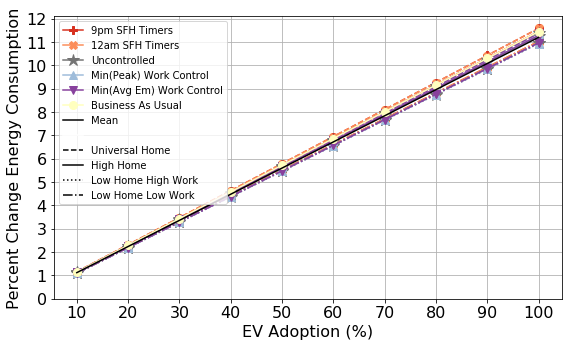

In [18]:

fig, axes = plt.subplots(1, 1, figsize=(8, 5))
colors = ['#d7301f', '#fc8d59', '#737373', '#9ebcda', '#88419d']
lines = ['--', '-', ':', '-.']

markers=['P', 'X', '*', '^', 'v']
ms = [8,8,12,8,8]

all_lines = np.zeros((21, 10))
ct = 0
for idx_control in range(5):
    for idx_access in range(4):
        axes.plot(np.arange(10, 105, 10), 100*((vals[:, idx_control, idx_access]-vals_shift)/vals_shift), lines[idx_access], color=colors[idx_control], marker=markers[idx_control],  markersize=ms[idx_control])
        all_lines[ct, :] = 100*((vals[:, idx_control, idx_access]-vals_shift)/vals_shift)
        ct += 1
axes.plot(np.arange(10, 105, 10), 100*((vals[:, 5, 4]-vals_shift)/vals_shift), lines[1], color='#ffffbf', marker='o',  markersize=ms[1])
all_lines[ct, :] = 100*((vals[:, 5, 4]-vals_shift)/vals_shift)

axes.plot(np.arange(10, 105, 10), np.mean(all_lines, axis=0), color='k')
    
axes.set_xticks(np.arange(10, 105, 10))
axes.set_xticklabels(np.arange(10, 105, 10), fontsize=16)
axes.set_xlabel('EV Adoption (%)', fontsize=16)
axes.set_yticks(np.arange(0, 13, 1))
axes.set_yticklabels(np.arange(0, 13, 1), fontsize=16)
axes.set_ylabel('Percent Change Energy Consumption', fontsize=16)
axes.set_ylim(bottom=0)
axes.set_axisbelow(True)        
axes.grid()

    
scens2 = ['Universal Home', 'High Home', 'Low Home High Work', 'Low Home Low Work']
control_labels = ['9pm SFH Timers', '12am SFH Timers', 'Uncontrolled', 'Min(Peak) Work Control', 'Min(Avg Em) Work Control', 'Business As Usual']
legend_elements = [Line2D([0], [0], marker=markers[i], markersize=ms[i], color=colors[i], label=control_labels[i], linestyle='-') for i in range(5)]
legend_elements.append(Line2D([0], [0], marker='o', markersize=ms[1], color='#ffffbf', label='Business As Usual', linestyle='-'))
legend_elements.append(Line2D([0], [0], marker=None, markersize=ms[1], color='k', label='Mean', linestyle='-'))
legend_elements.append(Line2D([0], [0], marker=None, markersize=ms[1], color='white', label='', linestyle='-'))
for j in range(4):
    legend_elements.append(Line2D([0], [0], marker=None, color='k', 
                          label=scens2[j], linestyle=lines[j]))
# axes.legend()
legend = axes.legend(handles=legend_elements, loc='upper left', fontsize=10)#, title='Access Scenario')
plt.tight_layout()
plt.savefig('SupplementPlotting/Plots/supfig1.pdf', bbox_inches='tight')
plt.show()



In [19]:
np.mean(all_lines, axis=0)

array([ 1.12027666,  2.24055332,  3.36082998,  4.48110665,  5.60138331,
        6.72165997,  7.84193663,  8.96221329, 10.08248995, 11.20276662])